# Workbook for Mapping Tutorials: Climate DataLab
### **Authors**

Samantha Stevenson sstevenson@ucsb.edu

### **Table of Contents**

[Goals](#purpose)

[Download and Import Needed Packages](#import)

[Set Global Parameters](#parameters)

[Read in Your Data Files (and Concatenate)](#data_io)

[Calculate Time Averages Over Specified Periods, Seasons](#time_avg)

[Plot Maps](#map)

[Explore Further on Your Own](#explore)

<a id='purpose'></a> 
# Goals

This is the companion "workbook" for the tutorials in the "Map Plots" Climate DataLab repository. It does not contain any code! You can use this as a space to create your own workflow, based on the steps in the tutorials. We have provided an overall structure for the workflow, but you are encouraged to customize your code using snippets from the tutorials in this or other repositories as you like.

Happy coding!

<a id='import'></a> 
## **Download + Import Needed Packages**

You will need the `xarray`, `matplotlib`, and `cartopy` packages in your Python environment in order to complete this tutorial. If these have not already been installed, you can use conda to install them. See tutorials in the [Time Series Plots](https://github.com/climate-datalab/Time-Series-Plots) repo for details on this process!

In [1]:
# Import required packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

<a id='parameters'></a> 
## **Set Global Parameters**

This step is optional but recommended if you are going to be changing your region or time period of interest around a lot. Here you can define arrays that contain the bounds of those regions or time periods, which you can use instead of 'hard coding' the numbers into your code (and potentially forgetting to do that everywhere you need to later).

Examples we used in tutorials 1 and 2 in this repo:
- defining a region of interest with lat/lon bounds

  [lon_min, lon_max, lat_min, lat_max] 

- defining starting and ending years for your analysis

  [start_year, end_year]
  
_note: the syntax above is optional, you can specify things in any order you want - just make sure you remember which number is which later on!_

In [ ]:
# Set any parameters you'll need later. For example:
# Array with region of interest
# [lon_min, lon_max, lat_min, lat_max]
region = [230, 295, 25, 51]


# Array with time periods of interest
# [starting year, ending year]
per_early = [1975, 2025]
per_late = [2026, 2075]

<a id='data_io'></a> 
## **Read in Your Data Files (and Concatenate)**

Next, you'll need to read in your data. If you want to work with a time period longer than the extent of a single data file, you'll also want to concatenate them together into a single xarray object to make it easier to work with the data!

The space below assumes you're reading in multiple data files, but feel free to ignore if you just have one.

In [4]:
# Read in data as xarray Dataset
# historical
data_hist = xr.open_dataset('/courses/EDS296/tas_Amon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc')

#ssp370
data_ssp = xr.open_dataset('/courses/EDS296/tas_Amon_CanESM5_ssp370_r10i1p1f1_gn_201501-210012.nc')

# concatenate
data = xr.concat([data_hist, data_ssp], dim="time")

<a id='time_avg'></a> 
## **Calculate Time Averages Over Specified Periods, Seasons**

In order to create a map, you'll need to reduce the dimension of the data to [lon x lat]. We did this in tutorials 1 and 2 by averaging over the time dimension.

During the course of your dimension reduction, you may also want to consider:
- performing annual averages (tutorial 1)
- extracting data for a given season and averaging only that data (tutorial 2)

In [ ]:
# Calculate time averages (gives annual mean)

# Extract data associated with the DJF season
# early period
data_early = data.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))

# late period
data_late = data.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))

In [6]:
# Calculate DJF mean during both time periods
# early
data_early_annmn = data_early.mean(dim="time")

# late
data_late_annmn = data_late.mean(dim="time")

<a id='map'></a> 
## **Plot Maps**

Now it's time to put your reduced data on a map! You can make one or many plots, and change the spatial domain however you like. The code comments below correspond to the plotting steps we followed in tutorial 2, but feel free to make it your own!

/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


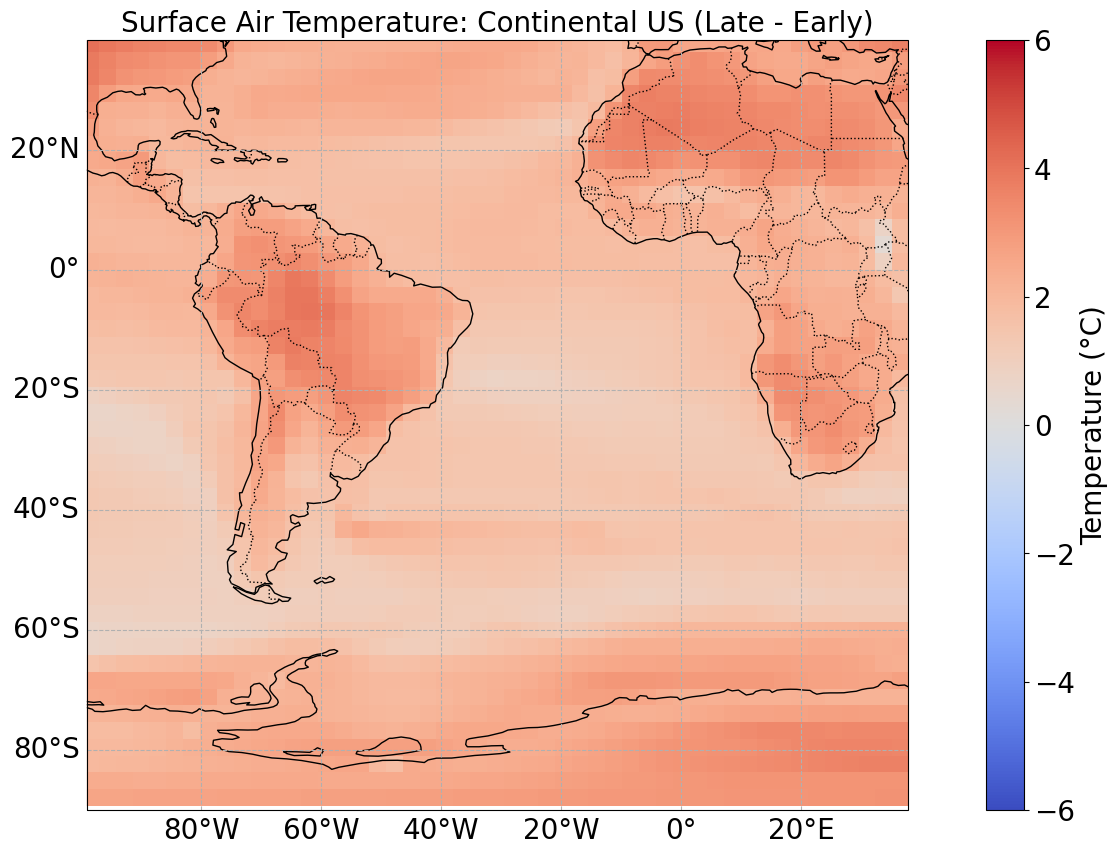

In [19]:
##### PLOT 1: Annual average

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection':map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(data_late_annmn.lon, data_late_annmn.lat, data_late_annmn.tas - data_early_annmn.tas,
                     transform=map, cmap="coolwarm",vmin=-6, vmax=6)

# Set spatial extent of plot
ax.set_extent(region, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)", fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False
gl.right_labels = False

# Set font size for x, y-axis labels
gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

# Add title, show plot
ax.set_title("Surface Air Temperature: Continental US (Late - Early)", fontsize= 20)
plt.show()


In [5]:
##### PLOT 2: DJF average

# Define object containing PlateCarree projection

# Create figure/axis objects, use the map object to specify associated projection

# Plot temperature data on the axes using the coolwarm colormap

# Set spatial extent of plot

# Add colorbar and label it

# Add coastline/border lines

# Add grid lines

# Set font size for x, y-axis labels

# Add title, show plot



<a id='explore'></a> 
## **Explore Further On your Own**

This space is for any extensions you'd like to do beyond the above. Some possibilities include:

- looking at additional seasons, not just DJF
- calculating differences between multiple time periods (how do changes by the end of the century compare with what's already happened? etc)
- comparing the map plots with regionally averaged time series

Feel free to pull from any or all of the tutorials or elsewhere on the Internet!